In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

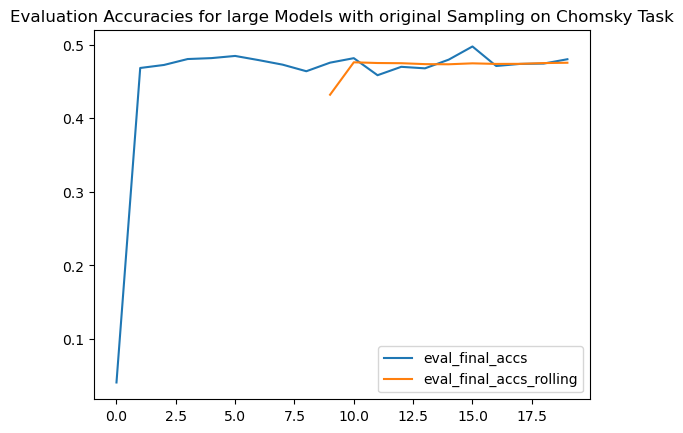

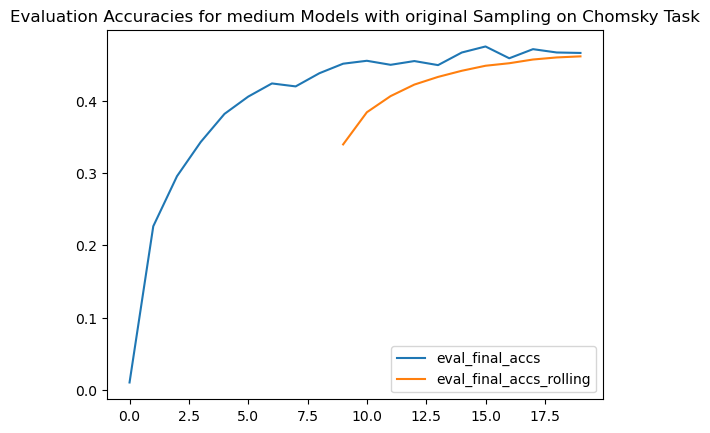

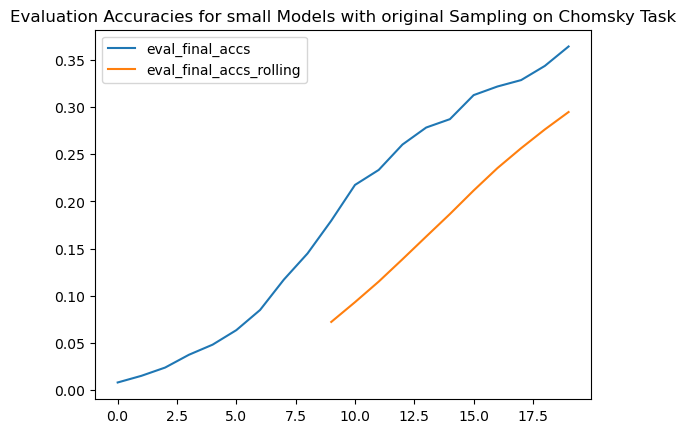

In [22]:
# Generate Eval Accuracies Graph
use_markovs = [
    # True, 
    False
]

model_sizes = [
    "large", 
    "medium", 
    "small"
]

for use_markov in use_markovs:
    suffix = "markov" if use_markov else "original"
    for model_size in model_sizes:
        results = pd.read_csv(f'artifacts/metrics_{suffix}_transformer_{model_size}.csv')
        eval_accs = results['eval_accs']
        eval_final_accs = results['eval_final_accs']
        # plt.plot(eval_accs, label='eval_accs')
        plt.plot(eval_final_accs, label='eval_final_accs')
        eval_accs_rolling = pd.Series(eval_accs).rolling(window=10).mean()
        eval_final_accs_rolling = pd.Series(eval_final_accs).rolling(window=10).mean()
        # plt.plot(eval_accs_rolling, label='eval_accs_rolling')
        plt.plot(eval_final_accs_rolling, label='eval_final_accs_rolling')
        plt.legend()
        plt.title(f'Evaluation Accuracies for {model_size} Models with {suffix} Sampling on Chomsky Task')
        plt.show()

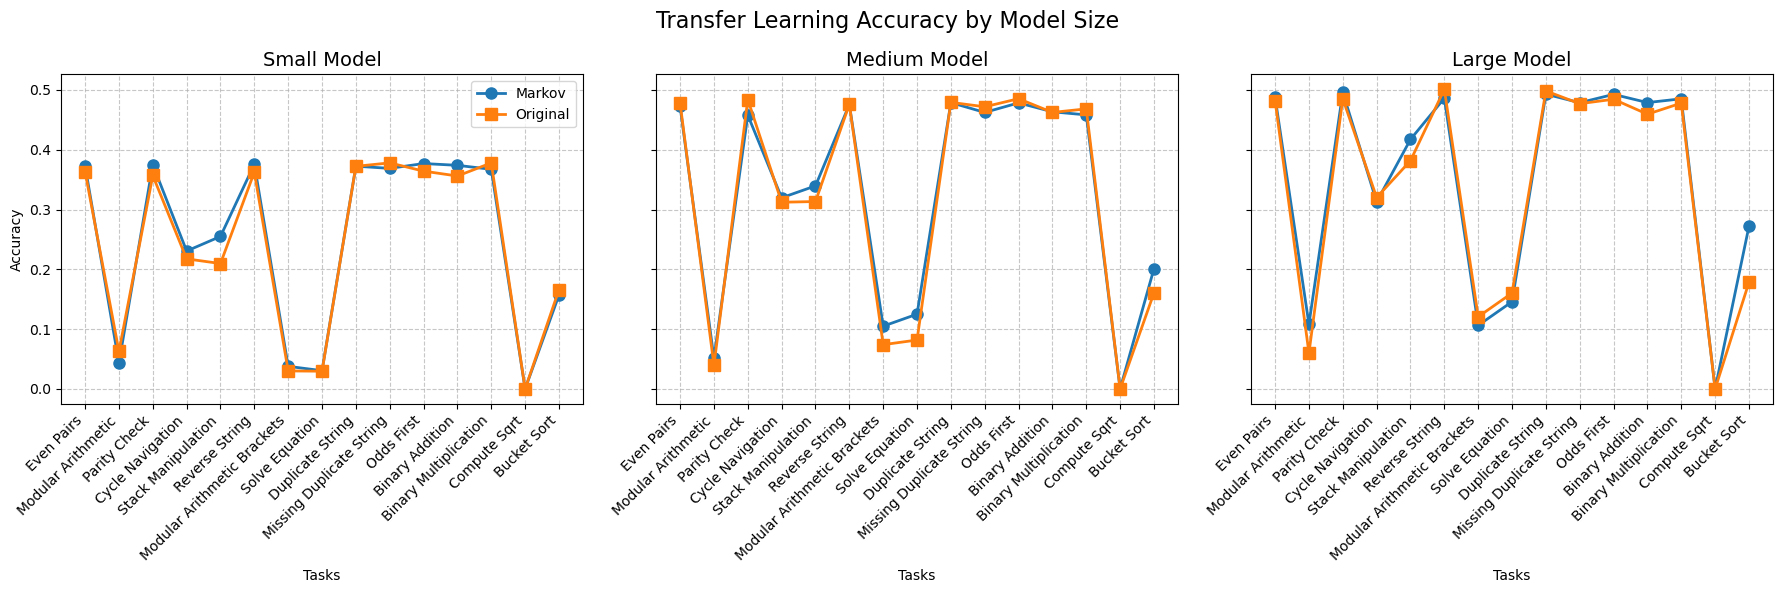

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the Chomsky results
with open('artifacts/chomsky_results.json', 'r') as f:
    chomsky_results = json.load(f)

model_types = ["markov", "original"]
model_sizes = ["small", "medium", "large"]  # Adjust order if desired
tasks = [
    "even_pairs",
    "modular_arithmetic",
    "parity_check",
    "cycle_navigation",
    "stack_manipulation",
    "reverse_string",
    "modular_arithmetic_brackets",
    "solve_equation",
    "duplicate_string",
    "missing_duplicate_string",
    "odds_first",
    "binary_addition",
    "binary_multiplication",
    "compute_sqrt",
    "bucket_sort",
]

# Prepare x-axis
x = np.arange(len(tasks))

# Create one row with three subplots for small, medium, large
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
fig.suptitle("Transfer Learning Accuracy by Model Size", fontsize=16)

# For consistent coloring/markers for each model_type, define them here
type_styles = {
    "markov":    {"color": "C0", "marker": "o"},
    "original":  {"color": "C1", "marker": "s"},
}

# Iterate over model sizes and subplots
for i, model_size in enumerate(model_sizes):
    ax = axs[i]

    # Plot each model type on the current subplot
    for model_type in model_types:
        # Construct the key used in chomsky_results
        model_key = f"artifacts/params_{model_type}_transformer_{model_size}.npz"
        if model_key in chomsky_results:
            # Collect accuracies for each task
            accuracies = []
            for task in tasks:
                if task in chomsky_results[model_key]:
                    accuracies.append(chomsky_results[model_key][task]["total_accuracy"])
                else:
                    accuracies.append(0.0)  # or np.nan, etc.

            # Plot the accuracy curve for this model_type
            style = type_styles.get(model_type, {})
            ax.plot(
                x,
                accuracies,
                label=model_type.capitalize(),
                linewidth=2,
                markersize=8,
                **style
            )
        else:
            # If no data is found for this model, you can skip or log a warning
            print(f"No data found for {model_key}, skipping plot.")

    # Format the subplot
    ax.set_title(f"{model_size.capitalize()} Model", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels([t.replace('_', ' ').title() for t in tasks], rotation=45, ha='right')
    ax.set_xlabel("Tasks")
    ax.grid(True, linestyle="--", alpha=0.7)

# Share the Y-axis label across subplots
axs[0].set_ylabel("Accuracy")

# Put a legend on the first (or any) subplot.
# Alternatively, use a single legend for all subplots with fig.legend(...)
axs[0].legend(loc="best")

plt.tight_layout()
plt.show()